# Nivell 1

## Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i normalitza els atributs categòrics en dummy. Estandaritza els atributs numèrics amb StandardScaler.

La següent base de dades prové de l'ajuntament de Barcelona on estudia el sexe i el nombre de persones per edat segons barri i districte.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Guillermo/Desktop/Curs Data Scientist/Sprint 8/demo_edad_sexo.csv")
df.head()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Edat_any_a_any,Nombre
0,2021,1,Ciutat Vella,1,el Raval,Dones,0 anys,199
1,2021,1,Ciutat Vella,2,el Barri Gòtic,Dones,0 anys,62
2,2021,1,Ciutat Vella,3,la Barceloneta,Dones,0 anys,40
3,2021,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,0 anys,55
4,2021,2,Eixample,5,el Fort Pienc,Dones,0 anys,83


In [11]:
df.tail()

,Any,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Edat_any_a_any,Nombre
14595,2021,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Homes,99 anys i més,1
14596,2021,10,Sant Martí,70,el Besòs i el Maresme,Homes,99 anys i més,6
14597,2021,10,Sant Martí,71,Provençals del Poblenou,Homes,99 anys i més,1
14598,2021,10,Sant Martí,72,Sant Martí de Provençals,Homes,99 anys i més,2
14599,2021,10,Sant Martí,73,la Verneda i la Pau,Homes,99 anys i més,3


In [4]:
df.shape

(14600, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14600 entries, 0 to 14599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             14600 non-null  int64 
 1   Codi_Districte  14600 non-null  int64 
 2   Nom_Districte   14600 non-null  object
 3   Codi_Barri      14600 non-null  int64 
 4   Nom_Barri       14600 non-null  object
 5   Sexe            14600 non-null  object
 6   Edat_any_a_any  14600 non-null  object
 7   Nombre          14600 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 912.6+ KB


In [9]:
df.isna().sum()

Any               0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Sexe              0
Edat_any_a_any    0
Nombre            0
dtype: int64

In [10]:
df.describe()

,Any,Codi_Districte,Codi_Barri,Nombre
count,14600.0,14600.000000,14600.000000,14600.000000
mean,2021.0,6.246575,37.000000,112.104932
std,0.0,2.788431,21.072029,96.996480
min,2021.0,1.000000,1.000000,0.000000
25%,2021.0,4.000000,19.000000,38.000000
50%,2021.0,7.000000,37.000000,88.000000
75%,2021.0,8.000000,55.000000,161.000000
max,2021.0,10.000000,73.000000,674.000000


In [22]:
edatAny = df.Edat_any_a_any.value_counts()
edatAny

0 anys           146
63 anys          146
73 anys          146
72 anys          146
71 anys          146
                ... 
30 anys          146
29 anys          146
28 anys          146
27 anys          146
99 anys i més    146
Name: Edat_any_a_any, Length: 100, dtype: int64

In [23]:
sum(edatAny!=146)

0

In [17]:
barri = df.Nom_Barri.value_counts()
barri

el Raval                                 200
la Teixonera                             200
Torre Baró                               200
la Trinitat Nova                         200
la Prosperitat                           200
                                        ... 
Sant Gervasi - la Bonanova               200
les Tres Torres                          200
Sarrià                                   200
Vallvidrera, el Tibidabo i les Planes    200
la Verneda i la Pau                      200
Name: Nom_Barri, Length: 73, dtype: int64

In [19]:
sum(barri != 200)

0

In [16]:
df.Sexe.value_counts()

Dones    7300
Homes    7300
Name: Sexe, dtype: int64

In [24]:
df.Any.value_counts()

2021    14600
Name: Any, dtype: int64

In [26]:
df.Nombre.describe()

count    14600.000000
mean       112.104932
std         96.996480
min          0.000000
25%         38.000000
50%         88.000000
75%        161.000000
max        674.000000
Name: Nombre, dtype: float64

Després d'estudiar la base de dades es veu que hi han 6 variables categòriques i una discreta. A més, totes les variables categòriques presenten el mateix número de valors. També hi han dades repetides ja que codi de districte i de barri correspon al nom al que pertany. Per un altre costat no hi ha NAs.

Com la variable any es la mateixa per totes les files s'eliminarà del dataset

In [3]:
df = df.drop('Any', axis=1)
df.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Sexe,Edat_any_a_any,Nombre
0,1,Ciutat Vella,1,el Raval,Dones,0 anys,199
1,1,Ciutat Vella,2,el Barri Gòtic,Dones,0 anys,62
2,1,Ciutat Vella,3,la Barceloneta,Dones,0 anys,40
3,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Dones,0 anys,55
4,2,Eixample,5,el Fort Pienc,Dones,0 anys,83


A continuació es procedirà a aplicar dummies a la variable Nom_Districte

In [4]:
Districtes = pd.get_dummies(df.Nom_Districte)
Districtes

,Ciutat Vella,Eixample,Gràcia,Horta-Guinardó,Les Corts,Nou Barris,Sant Andreu,Sant Martí,Sants-Montjuïc,Sarrià-Sant Gervasi
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14595,0,0,0,0,0,0,0,1,0,0
14596,0,0,0,0,0,0,0,1,0,0
14597,0,0,0,0,0,0,0,1,0,0
14598,0,0,0,0,0,0,0,1,0,0


In [42]:
len(Districtes)

14600

In [48]:
TotalDistrictes=Districtes.sum()
TotalDistrictes

Ciutat Vella            800
Eixample               1200
Gràcia                 1000
Horta-Guinardó         2200
Les Corts               600
Nou Barris             2600
Sant Andreu            1400
Sant Martí             2000
Sants-Montjuïc         1600
Sarrià-Sant Gervasi    1200
dtype: int64

In [49]:
TotalDistrictes.sum()

14600

Al sumar tots els valors de Districtes en dummy veiem que coincideix amb la longitud del arxiu. Per tant, la transformació es correcta ja que cada fila només te un valor.

A continuació s'estandaritzarà els valors numèrics amb StandardScaler. Per dur a terme aquesta pràctica s'utilitzarà la variable Nombre estudiant primer la seva distribució.

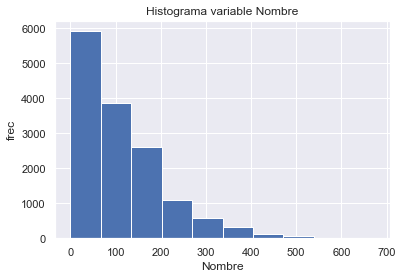

In [51]:
sns.set()
plt.hist(df.Nombre)
plt.xlabel('Nombre')
plt.ylabel('frec')
plt.title('Histograma variable Nombre')
plt.show()

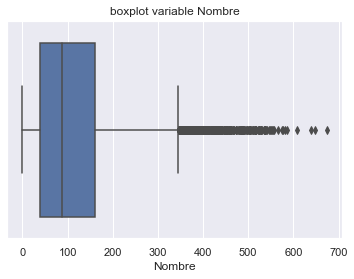

In [90]:
sns.boxplot(data = df, x = 'Nombre', orient = 'h')
plt.title('boxplot variable Nombre')
plt.show()

StandScaler al estandaritzar posa la mitja en 0 y SD en 1. Per fer això és necessari que la variable presenti una distribució normal. En canvi, tal i com s'observa en l'histograma no presenta aquesta distribució. Per tant, primer es provaran diferents transformacions per a que la distribució sigui una mica més simètrica.

In [10]:
import math

In [67]:
def log1(x):
    a = x+1
    b = math.log(a)
    return b

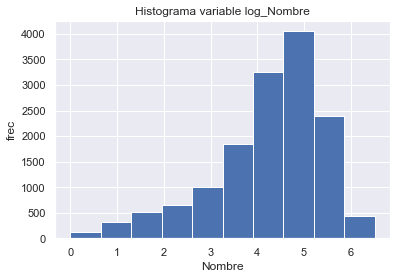

In [73]:
logNom = df['Nombre'].apply(lambda x: log1(x))
sns.set()
plt.hist(logNom)
plt.xlabel('Nombre')
plt.ylabel('frec')
plt.title('Histograma variable log_Nombre')
plt.show()

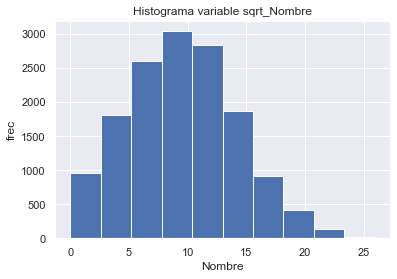

In [11]:
sqrtNom = df['Nombre'].apply(lambda x: math.sqrt(x))
sns.set()
plt.hist(sqrtNom)
plt.xlabel('Nombre')
plt.ylabel('frec')
plt.title('Histograma variable sqrt_Nombre')
plt.show()

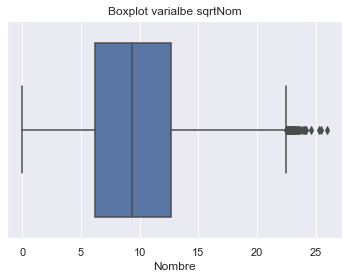

In [60]:
sns.boxplot(x = sqrtNom)
plt.title('Boxplot varialbe sqrtNom')
plt.show()

In [78]:
def div1(x):
    a = 1/(x+1)
    return a

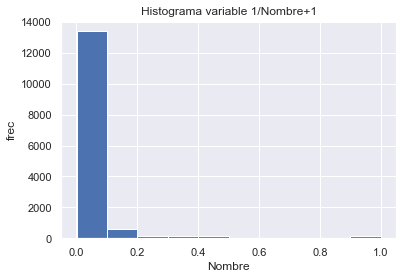

In [79]:
divNom = df['Nombre'].apply(lambda x: div1(x))
sns.set()
plt.hist(divNom)
plt.xlabel('Nombre')
plt.ylabel('frec')
plt.title('Histograma variable 1/Nombre+1')
plt.show()

Després de provar diferents transformacions s'ha vist que la transformació que dona millor resultat és aplicar l'arrel quadrada. Tot i així, presenta molts outliers que s'intentarà reduir a través de la normalització tot i que es probable que es mantingui la distribució.

En el cas de logaritme per evitar el logaritme de 0 s'ha sumat un 1 a tots els casos.



In [63]:
#Normalització
maxi = max(sqrtNom)
mini = min(sqrtNom)
print(maxi)
print(mini)

25.96150997149434
0.0


In [61]:
def normalitzacio(x,maxi, mini):
    a = (x-mini)/(maxi-mini)
    return a

In [64]:
norm_sqrtNom = sqrtNom.apply(lambda x: normalitzacio(x, maxi, mini))

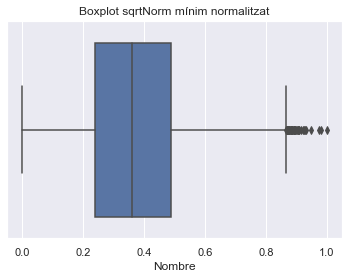

In [65]:
sns.boxplot(x = norm_sqrtNom)
plt.title('Boxplot sqrtNorm mínim normalitzat')
plt.show()

Com era d'esperar la normalització no modifica la presència d'outliers. Per tant es treballarà amb la variable sqrtNom.

Un cop determinat que l'arrel quadrada és la millor opció o la més aproximada a una distribució Gaussiana es provarà si segueix una distribució normal aplicant el test de Shapiro-Wilk.

In [39]:
from scipy.stats import shapiro
stat, p = shapiro(sqrtNom)
print('stat', stat, '\np', p)

stat 0.9911792278289795 
p 6.422434696734573e-29


C:\Users\Guillermo\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


El test de dona un p-valor <<< 0.05 i, en consecuencia, no segueix una distribució normal. Per tant, segons el test no seria recomenable aplicar una estandarització. Igualment, com ho demana l'exercici, es realitzarà l'estandarització amb StandardScaler.

In [13]:
from sklearn.preprocessing import StandardScaler

Com StandardScaler necessita un array o un dataframe es transforma la variable de serie a dataframe

In [31]:
dfSqrtNom = pd.DataFrame(sqrtNom)
type(dfSqrtNom)

pandas.core.frame.DataFrame

In [32]:
dfSqrtNom.head()

,Nombre
0,14.106736
1,7.874008
2,6.324555
3,7.416198
4,9.110434


In [33]:
scaler = StandardScaler()
scal_name = scaler.fit_transform(dfSqrtNom)

In [34]:
scal_name.shape

(14600, 1)

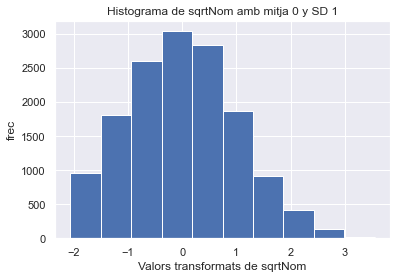

In [37]:
plt.hist(scal_name)
plt.title('Histograma de sqrtNom amb mitja 0 y SD 1')
plt.xlabel('Valors transformats de sqrtNom')
plt.ylabel('frec')
plt.show()

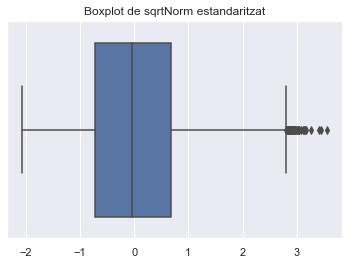

In [41]:
sns.boxplot(x=scal_name)
plt.title('Boxplot de sqrtNorm estandaritzat')
plt.show()

In [40]:
#Shaprio-Wilk test
stat, p = shapiro(scal_name)
print('stat', stat, '\np', p)

stat 0.9911804795265198 
p 6.449418178961653e-29


Després de transformar les dades s'observa que tant la distribució, el boxplot com el Shapiro-Wilk test donen resultats molt semblants, sobretot a nivell gràfic. Això és d'esperar perquè no es modifica la distribució de les dades.

Per un altre costat, per evitar els efectes perjudicials que poden produir els outliers a les nostres dades es poden utilitzar mètodes més robustos com la mitjana i la distància interquartílica en comptes de la mitja i la distribució estàndar per fer l'estandarització. Per utilitzar aquesta opció s'ha d'aplicar el mètode sklearn.preprocessing.RobustScaler que utilitza la mitjana y la IQD.

In [43]:
import sklearn.preprocessing as skl


In [54]:
robust = skl.RobustScaler()
robustData = robust.fit_transform(dfSqrtNom)


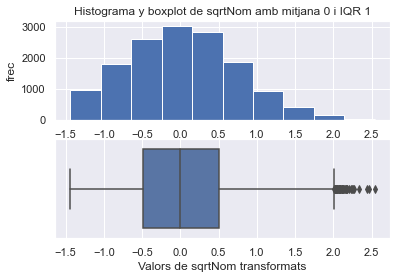

In [58]:
plt.subplot(2,1,1)
plt.hist(robustData)
plt.ylabel('frec')
plt.title('Histograma y boxplot de sqrtNom amb mitjana 0 i IQR 1')

plt.subplot(2,1,2)
sns.boxplot(x=robustData)
plt.xlabel('Valors de sqrtNom transformats')
plt.show()

L'aplicació de RobustScaler ha permés transfomar les dades centrant-les en la mitjana en comptes de la mitja i veient-se les dades menys influenciades per els valors atípics.